In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
data = pd.read_csv("/content/Invistico_Airline.csv")

In [ ]:
print(data)

        satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business     

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [ ]:
encoder = LabelEncoder()
data_imputed['Gender'] = encoder.fit_transform(data_imputed['Gender'])
data_imputed['Customer Type'] = encoder.fit_transform(data_imputed['Customer Type'])
data_imputed['Type of Travel'] = encoder.fit_transform(data_imputed['Type of Travel'])
data_imputed['Class'] = encoder.fit_transform(data_imputed['Class'])

In [ ]:
X = data_imputed.drop('satisfaction', axis=1)
y = data_imputed['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 79.12%


In [ ]:
recall=recall_score(y_test,y_pred,average='weighted')
print(recall)

0.7912303664921466


In [ ]:
precision=precision_score(y_test,y_pred,average='weighted')
print(precision)

0.791774199166763


In [ ]:
confusion=confusion_matrix(y_test,y_pred)
print(confusion)

[[ 8366  3309]
 [ 2114 12187]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

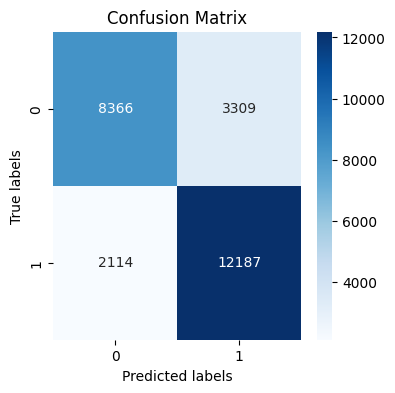

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0)

In [ ]:
decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

In [ ]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.942216


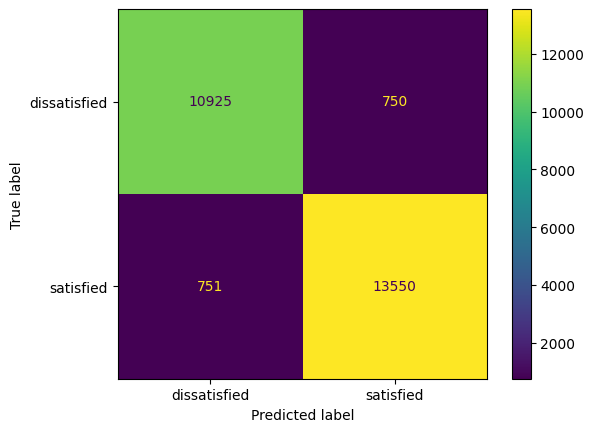

In [ ]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

In [ ]:
feature_names_list = ['Age', 'Class', 'Flight Distance', 'Seat comfort',
                      'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                      'Inflight wifi service', 'Inflight entertainment', 'Online support',
                      'Ease of Online booking', 'On-board service', 'Leg room service',
                      'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
                      'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male',
                      'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel']

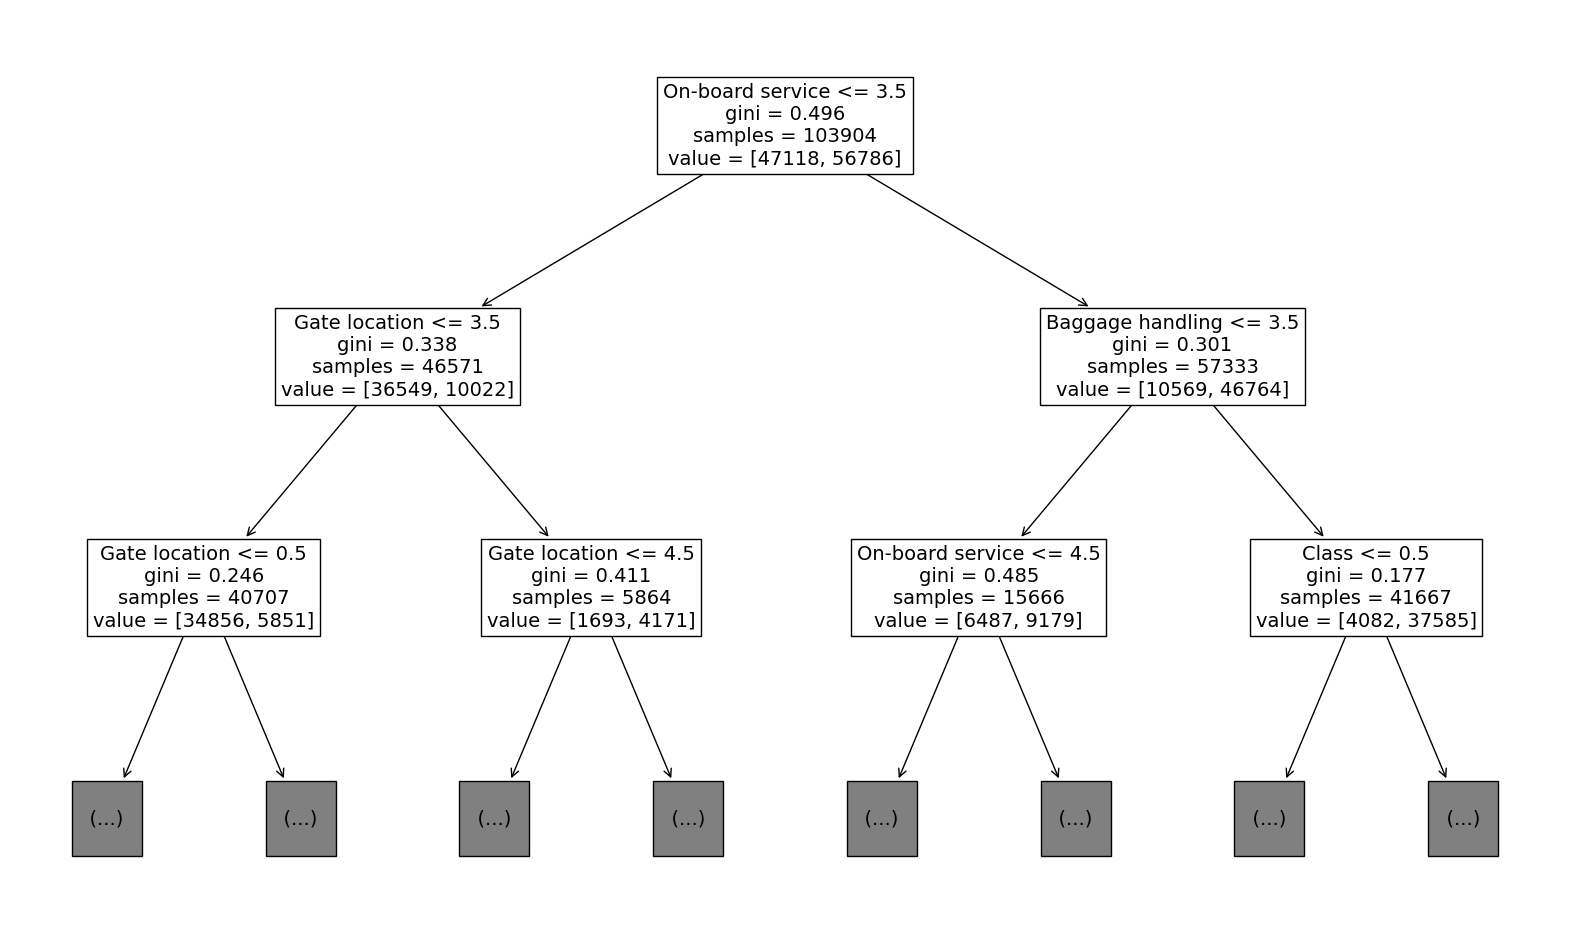

In [ ]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=feature_names_list);

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data = load_iris()
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


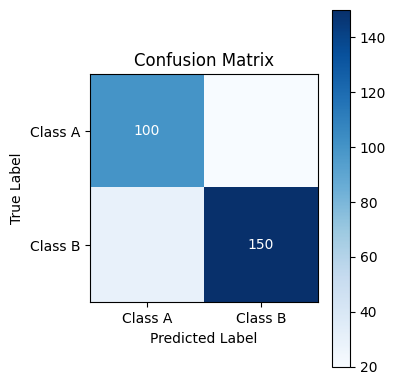

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
cm = np.array([[100, 20],
               [30, 150]])

plt.figure(figsize=(4, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Class A', 'Class B'])  # Assuming two classes
plt.yticks([0, 1], ['Class A', 'Class B'])  # Assuming two classes
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display only the two diagonals
for i in range(cm.shape[0]):
    plt.text(i, i, cm[i, i], ha="center", va="center", color="white")

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
data = load_iris()
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


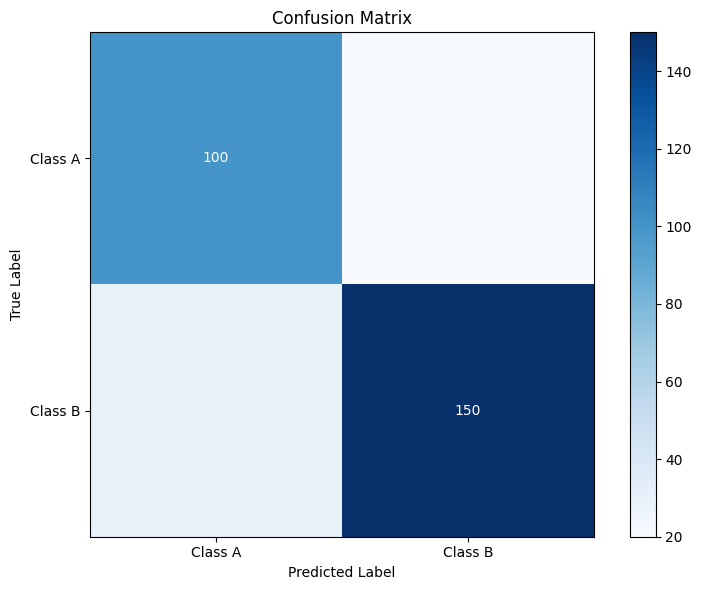

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example confusion matrix
# Replace this with your actual confusion matrix
cm = np.array([[100, 20],
               [30, 150]])

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Class A', 'Class B'])  # Assuming two classes
plt.yticks([0, 1], ['Class A', 'Class B'])  # Assuming two classes
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display only the two diagonals
for i in range(cm.shape[0]):
    plt.text(i, i, cm[i, i], ha="center", va="center", color="white")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

Accuracy: 0.9633


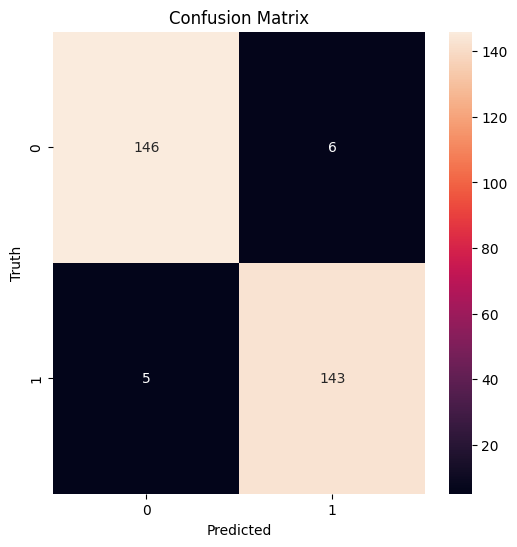

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

#plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Accuracy: 0.9133


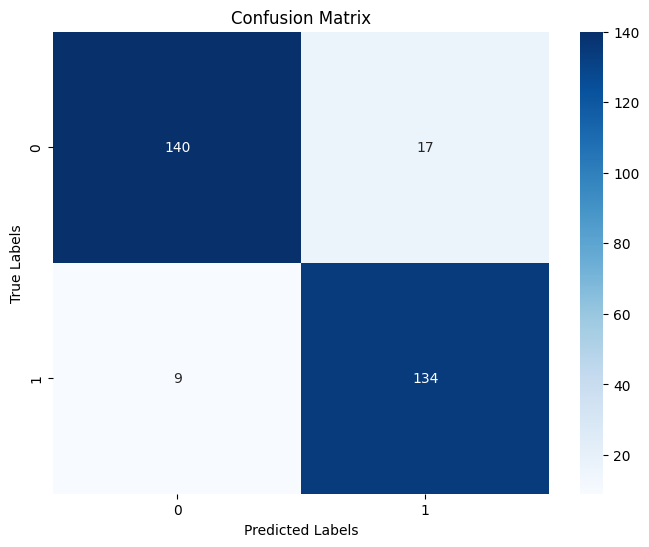

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
#graph for the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

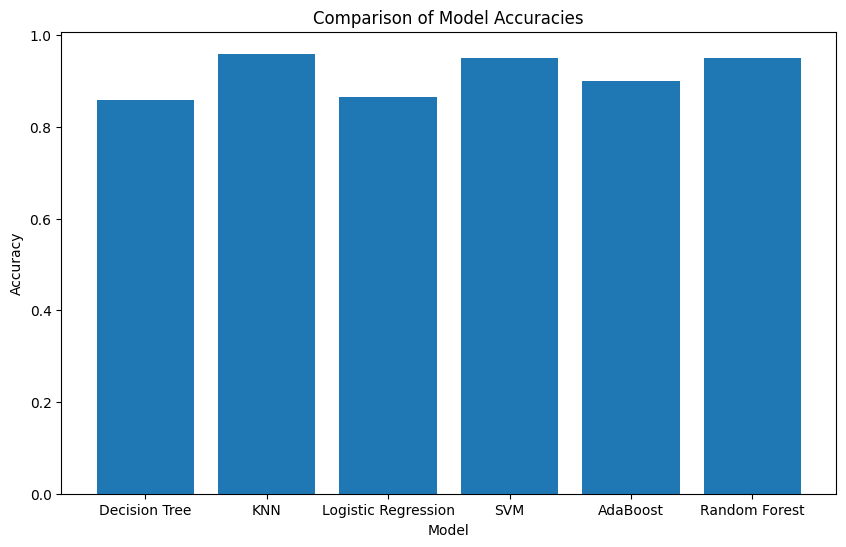

In [ ]:
import matplotlib.pyplot as plt
# Create a list of models and their names
models = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(),
    AdaBoostClassifier(),
    RandomForestClassifier()
]
model_names = ['Decision Tree', 'KNN', 'Logistic Regression', 'SVM', 'AdaBoost', 'Random Forest']

# Create a list to store the accuracies of each model
accuracies = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train each model and calculate its accuracy
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# a bar chart to compare the accuracies of the models
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()
